<a href="https://colab.research.google.com/github/DL-WG/ROMS-tutorial/blob/main/MNIST_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST with a fully-connected autoencoder: example
Thursday 4th March 2021

In [2]:
import tensorflow.keras as tf
from keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
!pip install eofs
import eofs
from eofs.standard import Eof
import numpy as np

     |████████████████████████████████| 1.0MB 5.5MB/s 
  Created wheel for eofs: filename=eofs-1.4.0-cp37-none-any.whl size=1100357 sha256=b41bb6d20fa21f96574ea18a1ac2082e852f091f3bf293319d749e00367424d4
  Stored in directory: /root/.cache/pip/wheels/47/f8/64/72dfdafae89c380846799c1396957cddd04decf459242ea988
Successfully built eofs


In [81]:
#Load data
(Xtrain, _), (Xtest, _) = load_data()
# summarize the shape of the dataset
print('Train', Xtrain.shape, )
print('Test', Xtest.shape, )

Train (60000, 28, 28)
Test (10000, 28, 28)


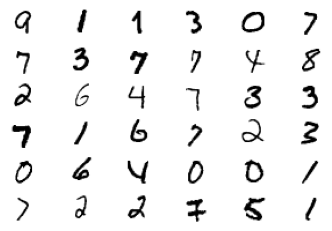

In [84]:
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.imshow(Xtrain[np.random.randint(Xtrain.shape[0])], cmap='gray_r')
  plt.axis('off')

In [91]:
#Gather model data
Xtrain = Xtrain.reshape((len(Xtrain), np.prod(Xtrain.shape[1:])))
Xtest = Xtest.reshape((len(Xtest), np.prod(Xtest.shape[1:])))
print(Xtrain.shape)
print(Xtest.shape)

(60000, 784)
(10000, 784)


In [94]:
#Scale data between 0 and 1
Xtrain = Xtrain/255.0
Xtest = Xtest/255.0
nSnapshots = Xtrain.shape[0]
nFeatures = Xtest.shape[1]

In [99]:
#Define model
input_enc = tf.Input(shape=(nFeatures))
enc = tf.layers.Dense(128)(input_enc)
enc_output = tf.layers.Dense(64)(enc)


input_dec = tf.Input(shape=(64))
dec = tf.layers.Dense(128)(input_dec)
dec = tf.layers.Dense(nFeatures, activation='sigmoid')(dec)

#Encoder model
enc_model = tf.Model(input_enc, enc_output)
enc_model.summary()
#Decoder model
dec_model = tf.Model(input_dec, dec)
dec_model.summary()
#ae model
ae_model = tf.Model(input_enc, dec_model(enc_output))

ae_model.compile(loss='binary_crossentropy', optimizer='adam')
Xtrain.shape
#y_train.shape

Model: "model_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_58 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_59 (Dense)             (None, 64)                8256      
Total params: 108,736
Trainable params: 108,736
Non-trainable params: 0
_________________________________________________________________
Model: "model_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 64)]              0         
_________________________________________________________________
dense_60 (Dense)             (None, 128)               8320      
__________________________________

(60000, 784)

In [100]:
history = ae_model.fit(Xtrain, Xtrain, epochs=50, batch_size=256, verbose=2, validation_data = (Xtest, Xtest), shuffle = True)


Epoch 1/50
235/235 - 4s - loss: 0.1997 - val_loss: 0.1294
Epoch 2/50
235/235 - 3s - loss: 0.1115 - val_loss: 0.0999
Epoch 3/50
235/235 - 3s - loss: 0.0962 - val_loss: 0.0908
Epoch 4/50
235/235 - 3s - loss: 0.0899 - val_loss: 0.0865
Epoch 5/50
235/235 - 3s - loss: 0.0860 - val_loss: 0.0834
Epoch 6/50
235/235 - 3s - loss: 0.0832 - val_loss: 0.0810
Epoch 7/50
235/235 - 3s - loss: 0.0812 - val_loss: 0.0794
Epoch 8/50
235/235 - 3s - loss: 0.0798 - val_loss: 0.0787
Epoch 9/50
235/235 - 3s - loss: 0.0786 - val_loss: 0.0774
Epoch 10/50
235/235 - 3s - loss: 0.0776 - val_loss: 0.0765
Epoch 11/50
235/235 - 3s - loss: 0.0767 - val_loss: 0.0761
Epoch 12/50
235/235 - 3s - loss: 0.0760 - val_loss: 0.0749
Epoch 13/50
235/235 - 3s - loss: 0.0754 - val_loss: 0.0744
Epoch 14/50
235/235 - 3s - loss: 0.0749 - val_loss: 0.0741
Epoch 15/50
235/235 - 3s - loss: 0.0745 - val_loss: 0.0736
Epoch 16/50
235/235 - 3s - loss: 0.0742 - val_loss: 0.0734
Epoch 17/50
235/235 - 3s - loss: 0.0739 - val_loss: 0.0732
Epoch 

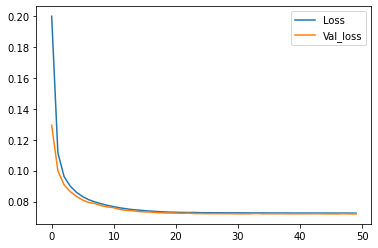

In [101]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Val_loss'])

In [120]:
#Reconstruction using AE
#Unscale the data

ae_prediction = ae_model.predict(Xtrain)

ae_prediction = ae_prediction*255.0
ae_prediction.shape

(60000, 784)

[56422 15795   860 38158 54343 44732 11284 54886  6265 16850]


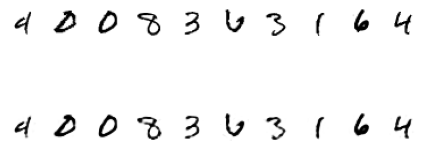

In [121]:
#Reconstruction using AE
#Same random numbers as PCA example
np.random.seed(42)
nDisplay = 10
randomIndex = np.random.randint(0, ae_prediction.shape[0], nDisplay)
print(randomIndex)
for i in range(nDisplay):
  plt.subplot(2, nDisplay, i+1)
  plt.imshow(np.reshape(Xtrain[randomIndex[i]], (28, 28)), cmap = 'gray_r')
  plt.axis('off')
  plt.subplot(2, nDisplay, i+1+nDisplay)
  plt.imshow(np.reshape(ae_prediction[randomIndex[i]], (28, 28)), cmap = 'gray_r')
  plt.axis('off')
plt.tight_layout()